In [9]:
import pandas as pd
import numpy as np
import sklearn.linear_model as sklm
import sklearn.metrics as skmet
import matplotlib.pyplot as plt

import sys
sys.path.append("../lib")
import plotting

In [10]:
KEY="2019chs_wk1"

In [11]:
df = pd.read_csv(f"../output/{KEY}_plusminus.csv")
df.index = df.team
df.columns

Index(['team', 'adjustPoints_mean', 'foulPoints_mean', 'cargoPoints_mean',
       'completeRocketRankingPoint_mean', 'rocketPoints_mean', 'rp_mean',
       'sandStormBonusPoints_mean', 'rocketLowPoints_mean',
       'rocketMidPoints_mean', 'teleopPoints_mean', 'win_mean',
       'autoPoints_mean', 'completedRocketNear_mean',
       'habDockingRankingPoint_mean', 'completedRocketFar_mean',
       'totalPoints_mean', 'hatchPanelPoints_mean', 'foulCount_mean',
       'habClimbPoints_mean', 'ownPoints_mean', 'rocketTopPoints_mean',
       'techFoulCount_mean'],
      dtype='object')

In [12]:
xcol = "totalPoints_mean"
x = df[xcol]
y = df.win_mean
names = df.index

In [13]:
model = sklm.LinearRegression().fit(df[[xcol]], y)

In [14]:
yhat = model.predict(df[[xcol]])
error = y - yhat
error_z = (error - error.mean()) / error.std()
skmet.r2_score(y, yhat)

0.8058997936133119

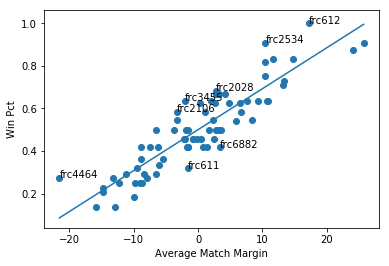

In [20]:
plotting.plot_with_fit(x, y, yhat, names, delta=1.5)

In [19]:
print('"Unluckiest" teams, by z-score')
error_z.sort_values(ascending=True) |> print
print('"Luckiest" teams, by z-score')
error_z.sort_values(ascending=False) |> print

"Unluckiest" teams, by z-score
team
frc611    -1.778026
frc6882   -1.741827
frc620    -1.472461
frc2421   -1.350191
frc1719   -1.348223
frc1731   -1.292702
frc540    -1.142993
frc316    -1.083268
frc346    -1.028507
frc614    -0.999422
frc5950   -0.975374
frc1598   -0.956460
frc3359   -0.900519
frc6543   -0.879995
frc2363   -0.837416
frc6334   -0.824262
frc1629   -0.817657
frc4242   -0.817001
frc3361   -0.749608
frc7330   -0.732098
frc2819   -0.696919
frc539    -0.637728
frc3136   -0.637728
frc6504   -0.634143
frc1895   -0.633924
frc7429   -0.600702
frc5804   -0.581587
frc1086   -0.563475
frc1413   -0.543358
frc2998   -0.542757
             ...   
frc6189    0.072785
frc3274    0.140524
frc3941    0.304061
frc623     0.345984
frc619     0.373806
frc6863    0.406573
frc1522    0.410230
frc3373    0.410631
frc977     0.561944
frc1262    0.598970
frc617     0.709647
frc5546    0.729162
frc3258    0.822329
frc384     0.879071
frc1599    0.991553
frc4286    1.027777
frc2988    1.122402
frc1